# Student Performance Factors
### Setting things up


In [4]:
#importing the things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set(style="darkgrid")

In [6]:
#naming the csv

ds = pd.read_csv('StudentPerformanceFactors.csv')

In [8]:
ds.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [10]:
#dropping the na values
ds=ds.dropna()

## Visual One: Sleep and Exam Scores
#### Boxplot

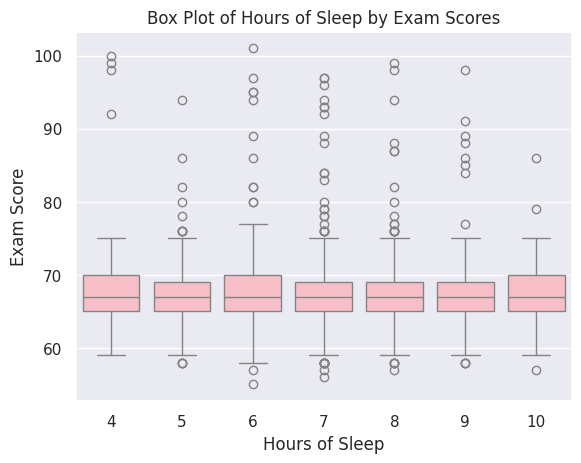

In [ ]:
#making a boxplot
sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=ds, color="lightpink")
plt.title('Box Plot of Hours of Sleep by Exam Scores')
plt.xlabel('Hours of Sleep')
plt.ylabel('Exam Score')
plt.show()

#### Violinplot

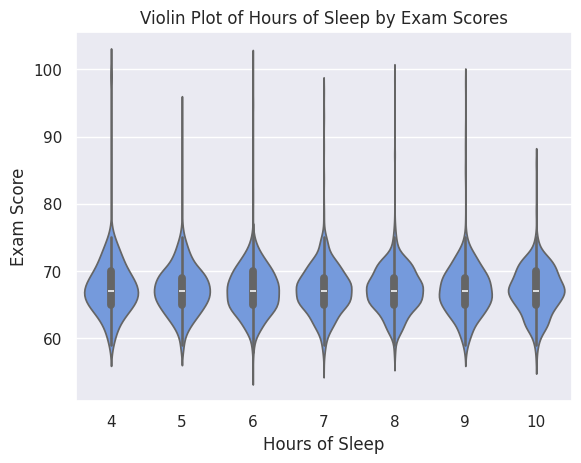

In [ ]:
#making a violin plot
sns.violinplot(x='Sleep_Hours', y='Exam_Score', data=ds, color="cornflowerblue")
plt.title('Violin Plot of Hours of Sleep by Exam Scores')
plt.xlabel('Hours of Sleep')
plt.ylabel('Exam Score')
plt.show()

## Visual Two: Past and Present Exam Scores
#### Regression

In [ ]:
# creating a numeric parental involvement column
ds['Parental_Involvement_Numeric'] = ds['Parental_Involvement'].replace({'Low': 1, 'Medium': 2, 'High': 3})
ds['Parental_Involvement_Numeric']=ds['Parental_Involvement_Numeric'].astype(int)

<ipython-input-8-ddec8d8b538a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['Parental_Involvement_Numeric'] = ds['Parental_Involvement'].replace({'Low': 1, 'Medium': 2, 'High': 3})


<ipython-input-15-1e29ddbc23f8>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() #the legend isn't working and it is making me evil.


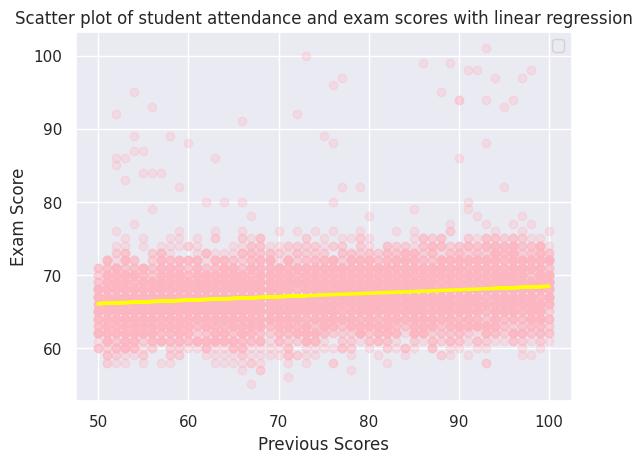

In [ ]:
#making variables
y = ds['Exam_Score']
x = ds['Previous_Scores']
#z=ds['Parental_Involvement_Numeric']

# number of observations/points
n = np.size(x)

# mean of x and y vector
m_x = np.mean(x)
m_y = np.mean(y)

# calculating cross-deviation and deviation about x
SS_xy = np.sum(y*x) - n*m_y*m_x
SS_xx = np.sum(x*x) - n*m_x*m_x

# calculating regression coefficients
b_1 = SS_xy / SS_xx
b_0 = m_y - b_1*m_x

# plotting the actual points as scatter plot
plt.scatter(x, y, marker = "o", c="lightpink", alpha=0.3)

# predicted response vector
y_pred = b_0 + b_1*x

# plotting the regression line
plt.plot(x, y_pred, color = "yellow", linewidth=2.5)

#adding the labels
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.title('Scatter plot of student attendance and exam scores with linear regression')
plt.legend() #the legend isn't working and it is making me evil.

## Visual Three: Study Habits, Attendance and Exam Scores
#### Scatterplot

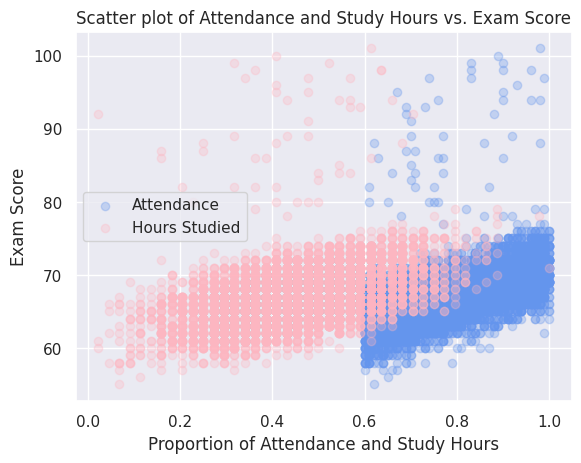

In [ ]:
from pickle import FALSE
##needs to be a proportion

#making a smaller dataset to loop through
ds1=ds.drop(["Parental_Involvement","Parental_Involvement_Numeric","Access_to_Resources","Extracurricular_Activities","Sleep_Hours","Previous_Scores","Motivation_Level", "Internet_Access","Tutoring_Sessions", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Physical_Activity", "Learning_Disabilities", "Parental_Education_Level","Distance_from_Home", "Gender"], axis=1)

z=['cornflowerblue']
#making a proportion
ds1["Proportion of Hours Studied"]=ds1["Hours_Studied"]/ds["Hours_Studied"].max()
ds1["Proportion of Attendance"]=ds1["Attendance"]/ds["Attendance"].max()
#looping through the columns to plot
'''for column in ds1.columns:
    if column != 'Exam_Score':
      if column!= 'Attendance':
        #plt.scatter(ds1['Proportion of Hours Studied'], ds1['Exam_Score'], label=column, c='lightpink')
        if column!= 'Hours_Studied':
          plt.scatter(ds1['Proportion of Attendance'], ds1['Exam_Score'], label=column, c='cornflowerblue')
          plt.scatter(ds1['Proportion of Hours Studied'], ds1['Exam_Score'], label=column, c='lightpink')'''

plt.scatter(ds1['Proportion of Attendance'], ds1['Exam_Score'], c='cornflowerblue', label="Attendance",alpha=0.3)
plt.scatter(ds1['Proportion of Hours Studied'], ds1['Exam_Score'], label="Hours Studied", c='lightpink',alpha=0.3)

#adding labels
plt.xlabel('Proportion of Attendance and Study Hours')
plt.ylabel('Exam Score')
plt.title('Scatter plot of Attendance and Study Hours vs. Exam Score')
plt.legend()
plt.grid(True)
plt.show()

##Visual Four: Demographic Factors and Exam Performance
##### Suzanne is doing this

#### Parental Education Level

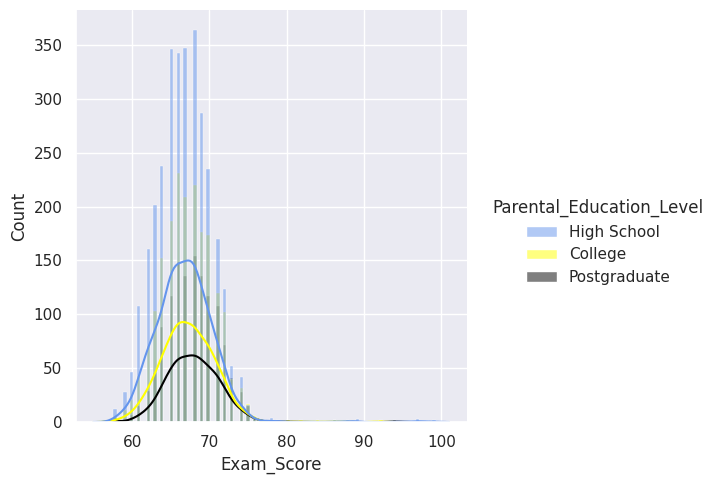

In [ ]:
a = sns.displot(data = ds, x = ds['Exam_Score'], kde = True, hue = 'Parental_Education_Level', palette = ["cornflowerblue", "yellow", "black"])

#### Internet Access

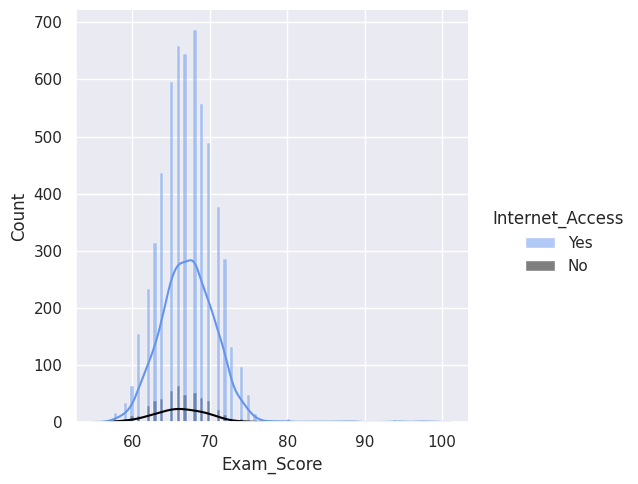

In [ ]:
sns.displot(data = ds, x = ds['Exam_Score'], kde = True, hue = 'Internet_Access', palette = ["cornflowerblue", "black"])

#### Access To Resources

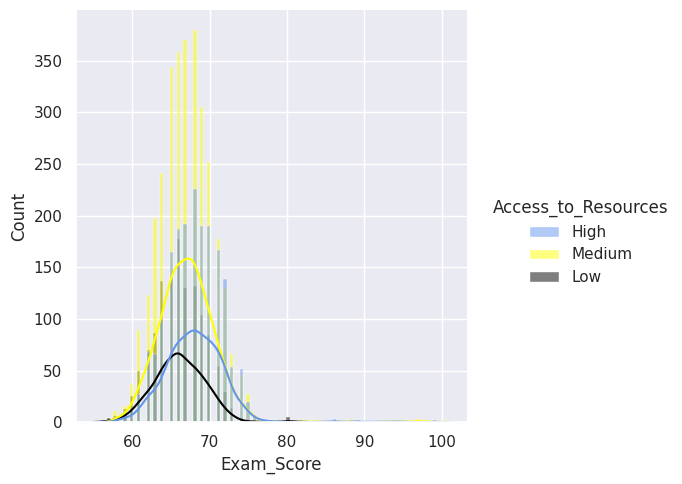

In [ ]:
sns.displot(data = ds, x = ds['Exam_Score'], kde = True, hue = 'Access_to_Resources', palette = ["cornflowerblue", "yellow", "black"])

#### School Type

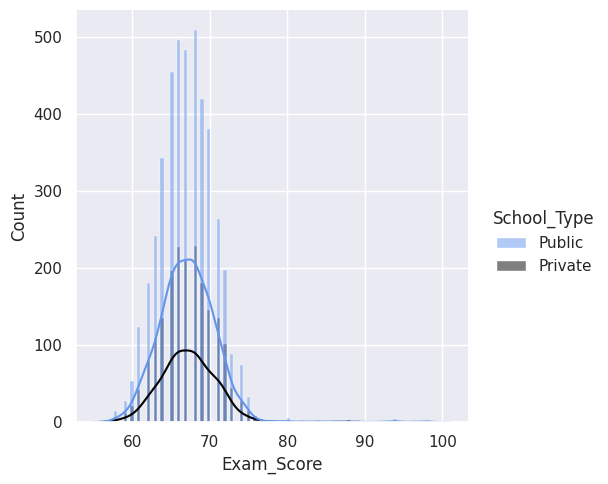

In [ ]:
sns.displot(data = ds, x = ds['Exam_Score'], kde = True, hue = 'School_Type', palette = ["cornflowerblue", "black"])

## Visual Five: The Ideal Student
##### Tatum is looking into this

In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

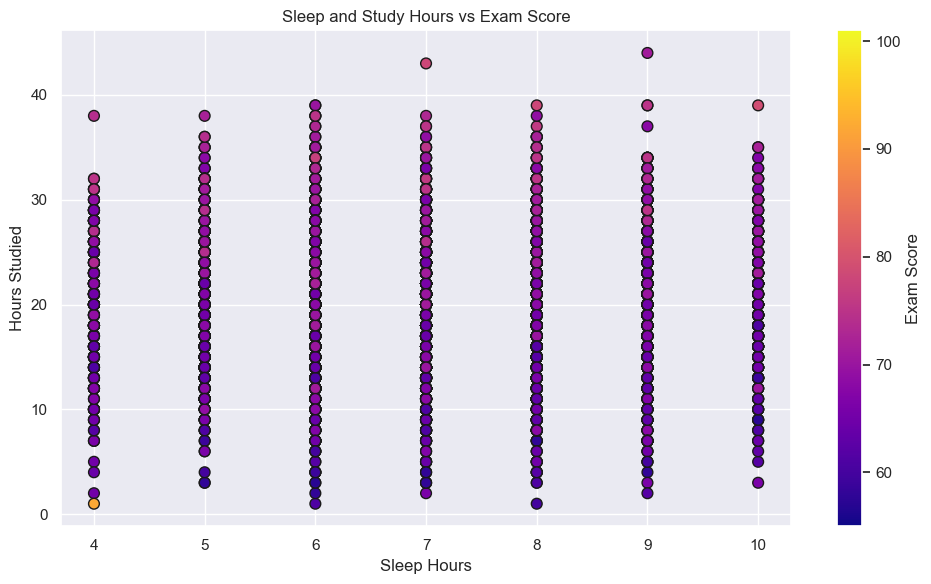

In [46]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ds['Sleep_Hours'],
    ds['Hours_Studied'],
    c=ds['Exam_Score'],  #color based on final exam score
    cmap='plasma',
    edgecolor='k',
    s=60
)

#axis
plt.xlabel('Sleep Hours')
plt.ylabel('Hours Studied')

#title
plt.title('Sleep and Study Hours vs Exam Score')

#legend
cbar = plt.colorbar(scatter)
cbar.set_label('Exam Score')

plt.tight_layout()
plt.show()

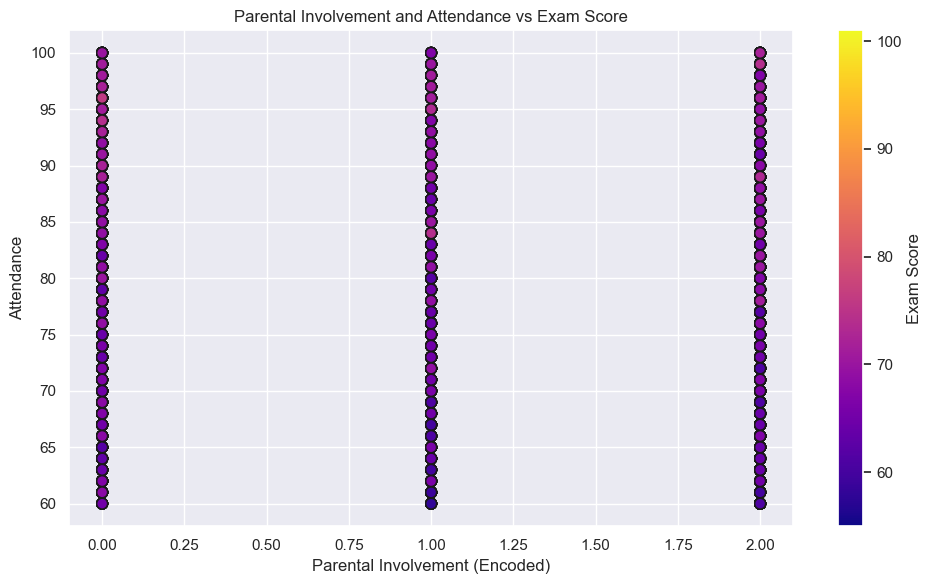

In [48]:
from sklearn.preprocessing import LabelEncoder

#encode it
if 'Parental_Involvement_Numeric' not in ds.columns:
    le = LabelEncoder()
    ds['Parental_Involvement_Numeric'] = le.fit_transform(ds['Parental_Involvement'])

plt.figure(figsize=(10, 6))
plt.scatter(
    ds['Parental_Involvement_Numeric'],
    ds['Attendance'],
    c=ds['Exam_Score'],       #color based on Exam Score
    cmap='plasma',
    edgecolor='k',
    s=60
)
plt.xlabel('Parental Involvement (Encoded)')
plt.ylabel('Attendance')
plt.title('Parental Involvement and Attendance vs Exam Score')
plt.colorbar(label='Exam Score')
plt.tight_layout()
plt.show()

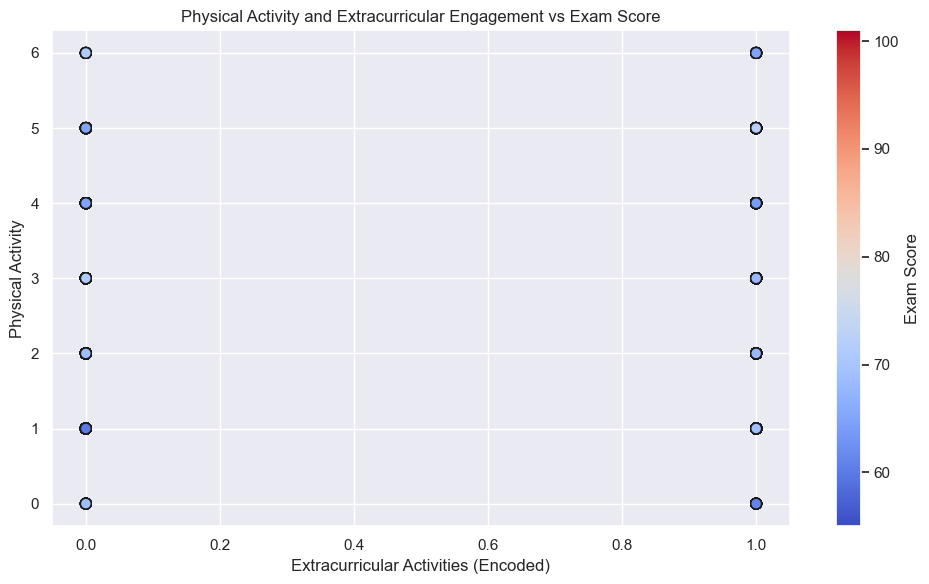

In [50]:
from sklearn.preprocessing import LabelEncoder

#encode it
if 'Extracurricular_Activities_Num' not in ds.columns:
    le = LabelEncoder()
    ds['Extracurricular_Activities_Num'] = le.fit_transform(ds['Extracurricular_Activities'])

plt.figure(figsize=(10, 6))
plt.scatter(
    ds['Extracurricular_Activities_Num'],
    ds['Physical_Activity'],
    c=ds['Exam_Score'], 
    cmap='coolwarm',
    edgecolor='k',
    s=60
)
plt.xlabel('Extracurricular Activities (Encoded)')
plt.ylabel('Physical Activity')
plt.title('Physical Activity and Extracurricular Engagement vs Exam Score')
plt.colorbar(label='Exam Score')  
plt.tight_layout()
plt.show()


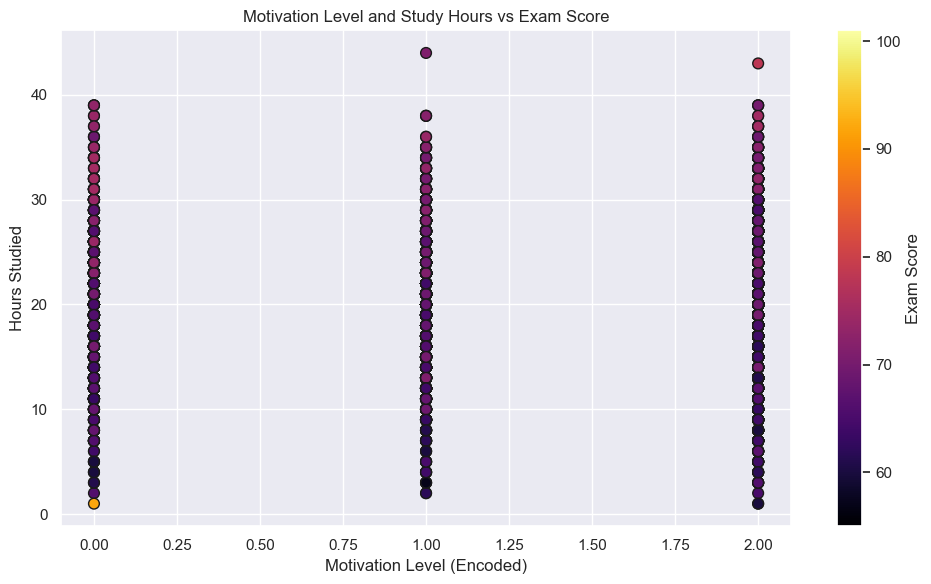

In [51]:
#encode it
ds['Motivation_Level_Num'] = label_encoders['Motivation_Level'].transform(ds['Motivation_Level'])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ds['Motivation_Level_Num'],
    ds['Hours_Studied'],
    c=ds['Exam_Score'], 
    cmap='inferno',
    edgecolor='k',
    s=60
)

#axis
plt.xlabel('Motivation Level (Encoded)')
plt.ylabel('Hours Studied')

#title
plt.title('Motivation Level and Study Hours vs Exam Score')

#legend
cbar = plt.colorbar(scatter)
cbar.set_label('Exam Score')

plt.tight_layout()
plt.show()

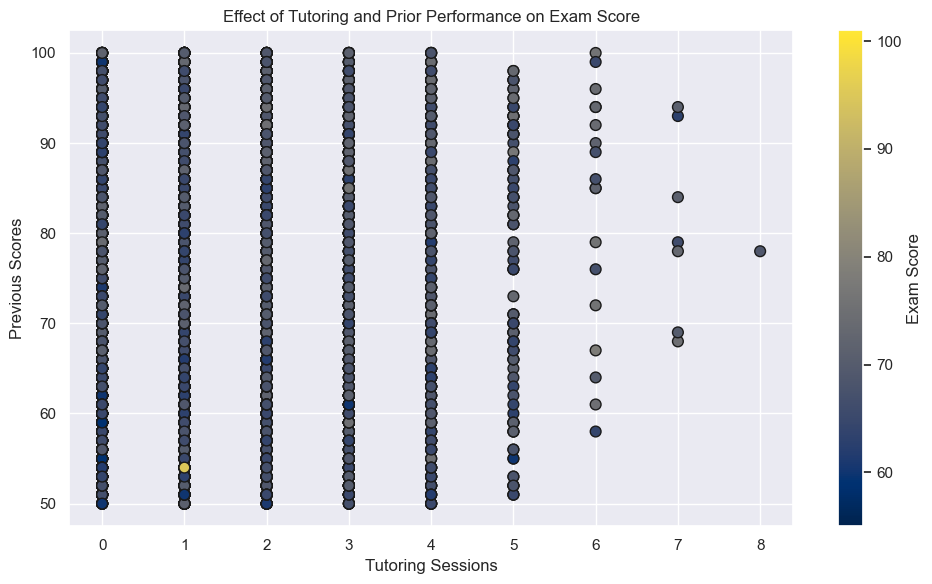

In [54]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ds['Tutoring_Sessions'],
    ds['Previous_Scores'],
    c=ds['Exam_Score'], 
    cmap='cividis',
    edgecolor='k',
    s=60
)

#axis
plt.xlabel('Tutoring Sessions')
plt.ylabel('Previous Scores')

#title
plt.title('Effect of Tutoring and Prior Performance on Exam Score')

#legend
cbar = plt.colorbar(scatter)
cbar.set_label('Exam Score')

plt.tight_layout()
plt.show()


/var/folders/_b/wzv8rm792571n79x52lp_ghh0000gn/T/ipykernel_93491/753485807.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="coolwarm")


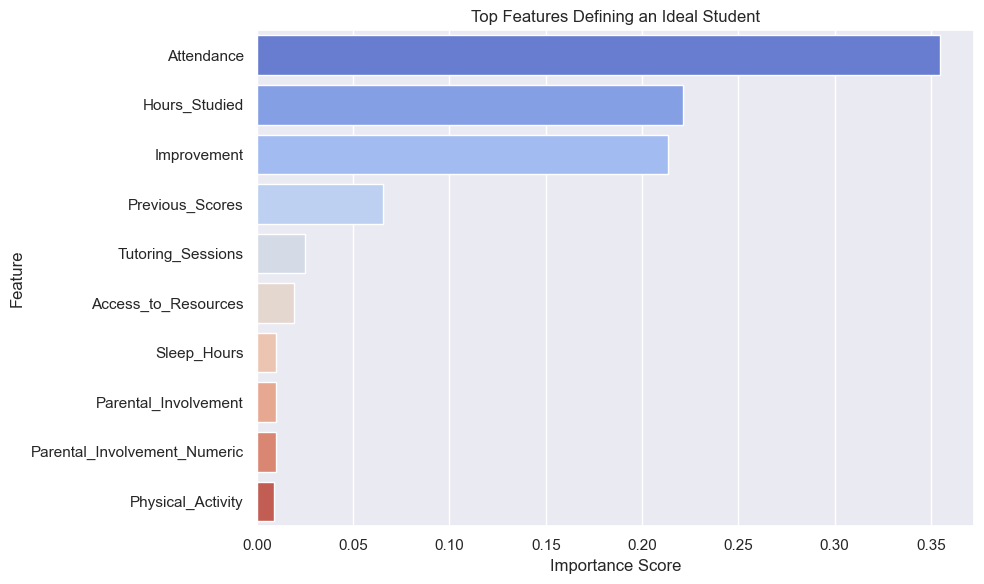

In [56]:
#encoding our categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

df = ds.copy()

#encode all object-type columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#define features 
#drop Exam_Score, the target
X = df.drop(columns=["Exam_Score"])
y = df["Exam_Score"]

#fit random forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

#feature importances
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

#plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="coolwarm")
plt.title("Top Features Defining an Ideal Student")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

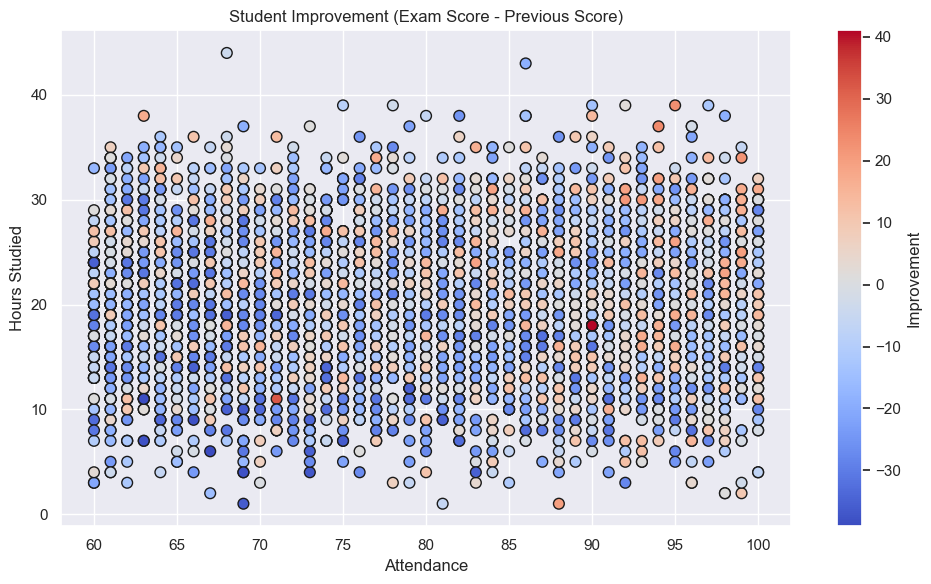

In [58]:
#calculate improvement
ds['Improvement'] = ds['Exam_Score'] - ds['Previous_Scores']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ds['Attendance'],
    ds['Hours_Studied'],
    c=ds['Improvement'],
    cmap='coolwarm',
    edgecolor='k',
    s=60
)

#labels and title
plt.xlabel('Attendance')
plt.ylabel('Hours Studied')
plt.title('Student Improvement (Exam Score - Previous Score)')
cbar = plt.colorbar(scatter)
cbar.set_label('Improvement')

plt.tight_layout()
plt.show()


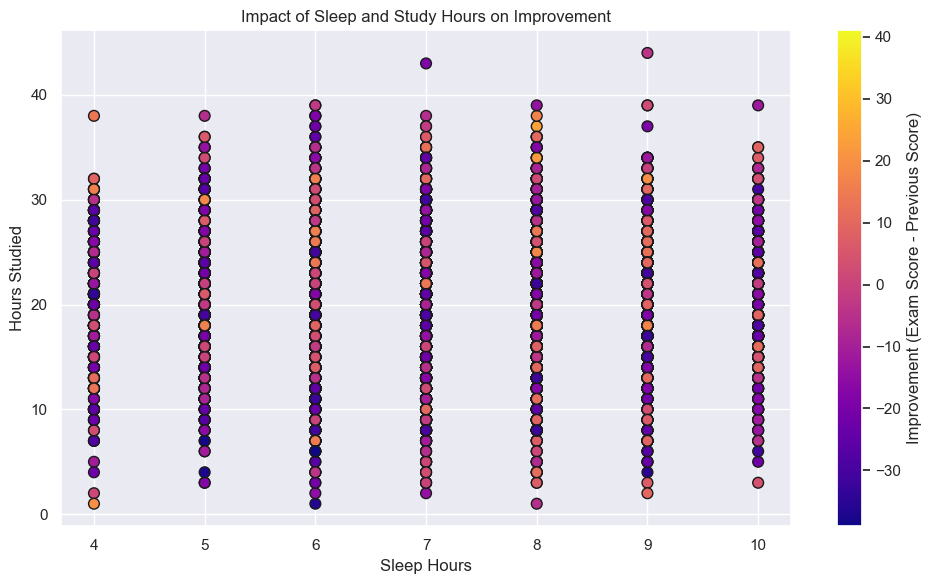

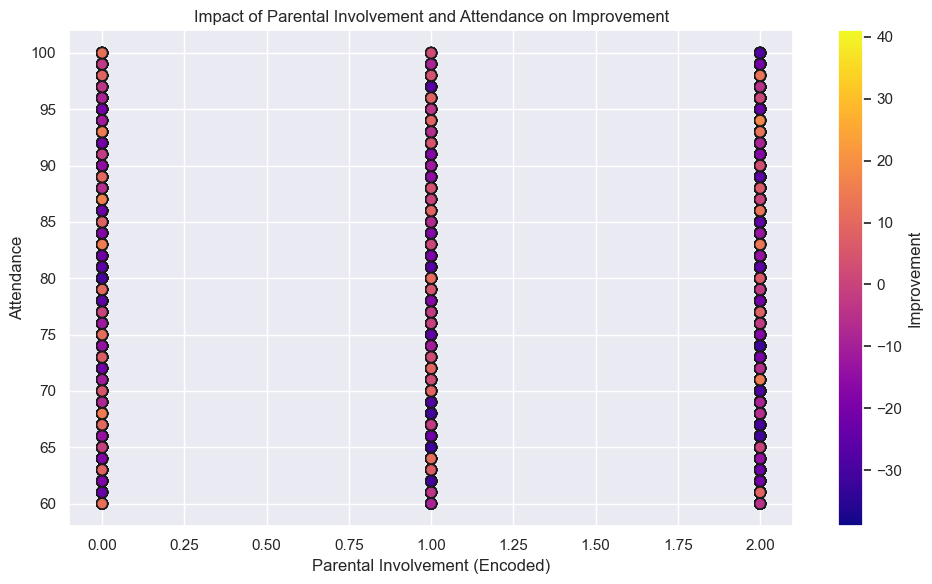

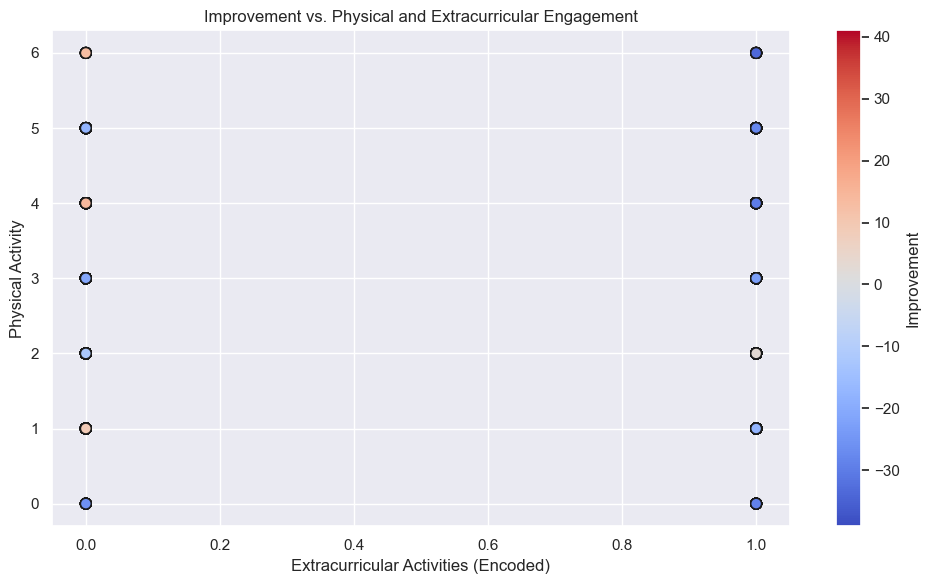

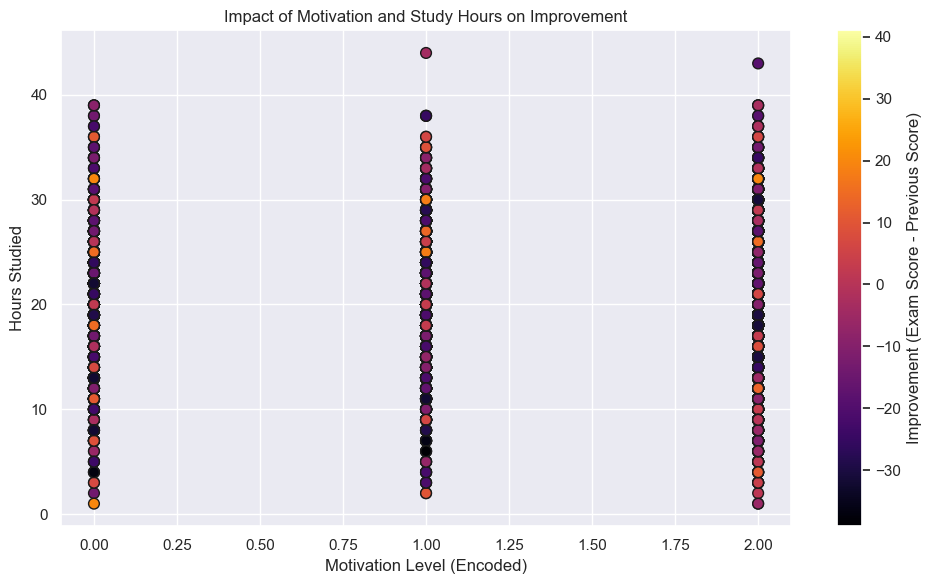

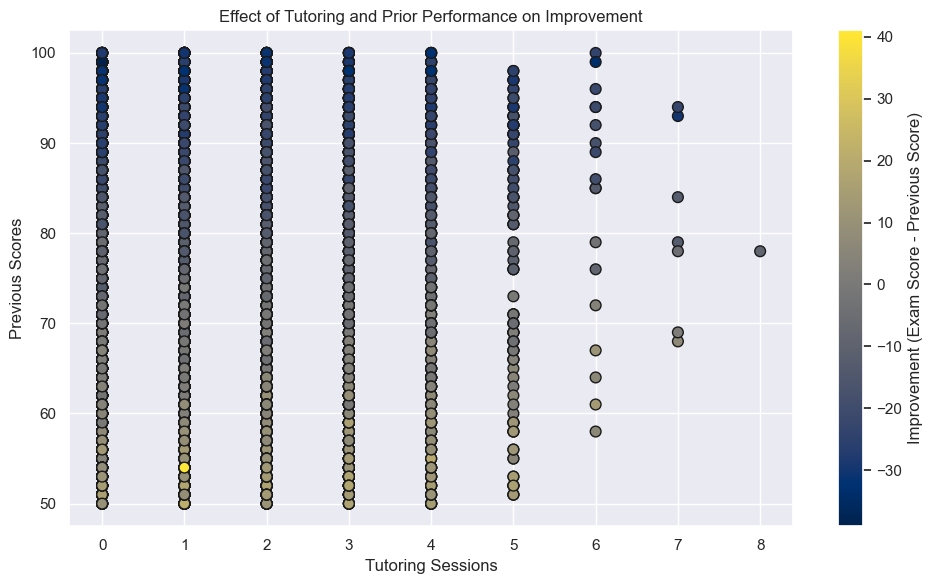

In [44]:
#tried again with improvement
#SLEEP HOURS AND HOURS STUDIED WITH IMPROVEMENT
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ds['Sleep_Hours'],
    ds['Hours_Studied'],
    c=ds['Improvement'],
    cmap='plasma',
    edgecolor='k',
    s=60
)

#axis labels
plt.xlabel('Sleep Hours')
plt.ylabel('Hours Studied')

#title
plt.title('Impact of Sleep and Study Hours on Improvement')

#legend
cbar = plt.colorbar(scatter)
cbar.set_label('Improvement (Exam Score - Previous Score)')

plt.tight_layout()
plt.show()

#PARENTAL INVOLVEMENT AND ATTENDANCE WITH IMPROVEMENT

from sklearn.preprocessing import LabelEncoder

#ENCODE IT
if 'Parental_Involvement_Numeric' not in ds.columns:
    le = LabelEncoder()
    ds['Parental_Involvement_Numeric'] = le.fit_transform(ds['Parental_Involvement'])

plt.figure(figsize=(10, 6))
plt.scatter(
    ds['Parental_Involvement_Numeric'],
    ds['Attendance'],
    c=ds['Improvement'],
    cmap='plasma',
    edgecolor='k',
    s=60
)
plt.xlabel('Parental Involvement (Encoded)')
plt.ylabel('Attendance')
plt.title('Impact of Parental Involvement and Attendance on Improvement')
plt.colorbar(label='Improvement')
plt.tight_layout()
plt.show()

#EXTRACURRICULAR ACTIVITIES AND PHYSICAL ACTIVITY WITH IMPROVEMENT
from sklearn.preprocessing import LabelEncoder

#ENCODE IT
if 'Extracurricular_Activities_Num' not in ds.columns:
    le = LabelEncoder()
    ds['Extracurricular_Activities_Num'] = le.fit_transform(ds['Extracurricular_Activities'])

plt.figure(figsize=(10, 6))
plt.scatter(
    ds['Extracurricular_Activities_Num'],
    ds['Physical_Activity'],
    c=ds['Improvement'],
    cmap='coolwarm',
    edgecolor='k',
    s=60
)
plt.xlabel('Extracurricular Activities (Encoded)')
plt.ylabel('Physical Activity')
plt.title('Improvement vs. Physical and Extracurricular Engagement')
plt.colorbar(label='Improvement')
plt.tight_layout()
plt.show()

# MOTIVATION LEVEL AND HOURS STUDIED WITH IMPROVEMENT
ds['Motivation_Level_Num'] = label_encoders['Motivation_Level'].transform(ds['Motivation_Level'])
#plt.scatter(ds['Motivation_Level_Num'], ds['Hours_Studied'], c=ds['Improvement'], cmap='inferno')

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ds['Motivation_Level_Num'],
    ds['Hours_Studied'],
    c=ds['Improvement'],
    cmap='inferno',
    edgecolor='k',
    s=60
)

#axis
plt.xlabel('Motivation Level (Encoded)')
plt.ylabel('Hours Studied')

#title
plt.title('Impact of Motivation and Study Hours on Improvement')

#legend
cbar = plt.colorbar(scatter)
cbar.set_label('Improvement (Exam Score - Previous Score)')

plt.tight_layout()
plt.show()



#TUTORING SESSIONS AND PREVIOUS SCORES WITH IMPROVEMENT
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    ds['Tutoring_Sessions'],
    ds['Previous_Scores'],
    c=ds['Improvement'],
    cmap='cividis',
    edgecolor='k',
    s=60
)

#axis
plt.xlabel('Tutoring Sessions')
plt.ylabel('Previous Scores')

#title
plt.title('Effect of Tutoring and Prior Performance on Improvement')

#legend
cbar = plt.colorbar(scatter)
cbar.set_label('Improvement (Exam Score - Previous Score)')

plt.tight_layout()
plt.show()

## Visual Six: Motivation, Sleep Hours, and Final Exam Scores
##### Courtney this is all you

motivation - low, medium, high
sleep hours - numeric
final exam scores - numeric
First look at motivation vs sleep
then motivation vs exam


In [14]:
#print(ds['Motivation_Level'].value_counts())
#print(ds["Motivation_Level"].sum())


Motivation_Level
Medium    50.752587
Low       29.225463
High      20.021950
Name: count, dtype: float64


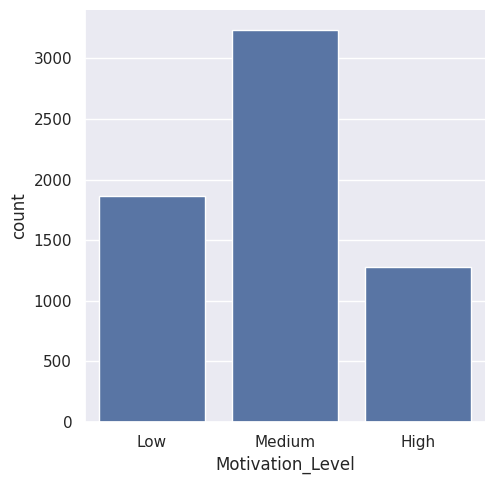

In [ ]:
sns.catplot(kind="count", data=ds, x="Motivation_Level")

props=(ds['Motivation_Level'].value_counts()/ds['Motivation_Level'].count())*100
#29.23% have low motivation
#50.75% have medium motivation
#20.92% have high motivation

print(props)

Distribution of Motivation Level according to sleep hours.

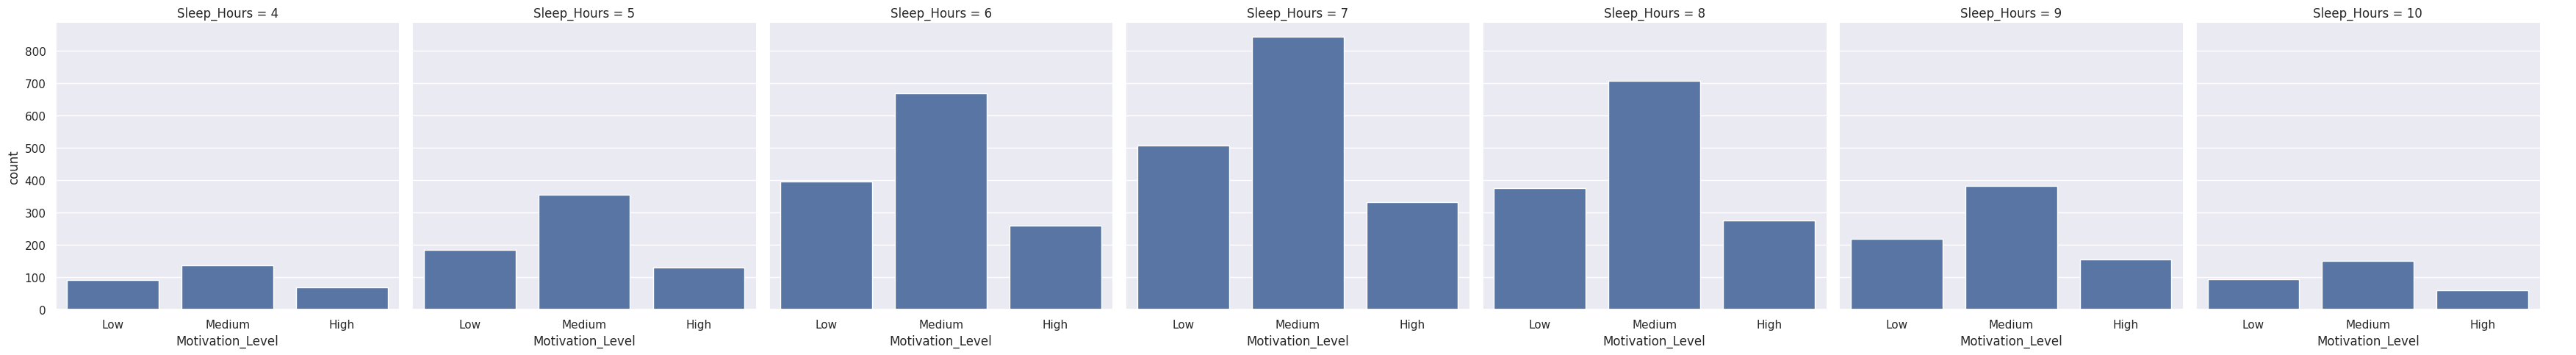

In [ ]:
#graph of counts of low,med,high separated on sleep hours, and then final exam scores

sns.catplot(kind="count", data=ds, x="Motivation_Level", col="Sleep_Hours")
#print((ds["Sleep_Hours"] ==4 & ds["Motivation_Level"]=="High").value_counts())

Since the distribution across sleep hours is the same regardless of the amount of sleep hours, the above set of graphs would be redundant to include in the presentation and would most likely appear confusing instead of helpful.

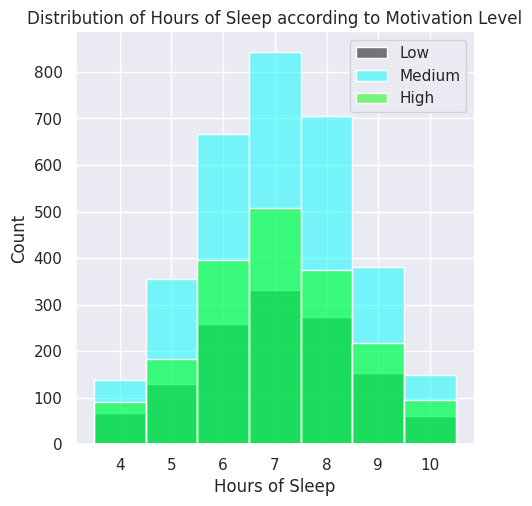

In [ ]:

sns.displot(data = ds, x = 'Sleep_Hours', hue = 'Motivation_Level', palette = [ "lime","cyan","black"], discrete=True, legend=False)
plt.title('Distribution of Hours of Sleep according to Motivation Level')
plt.xlabel('Hours of Sleep')
plt.legend(labels=["Low", "Medium", "High"])
plt.show()

This graph, due to the large amount of sleep hours that a person could get, does not make any sense and will not be used in the presentation.

<ipython-input-37-6bf2589b0bb4>:1: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.displot(data = ds, hue = 'Sleep_Hours', x = 'Motivation_Level', palette = [ "lightpink","blue","yellow"], discrete=True)


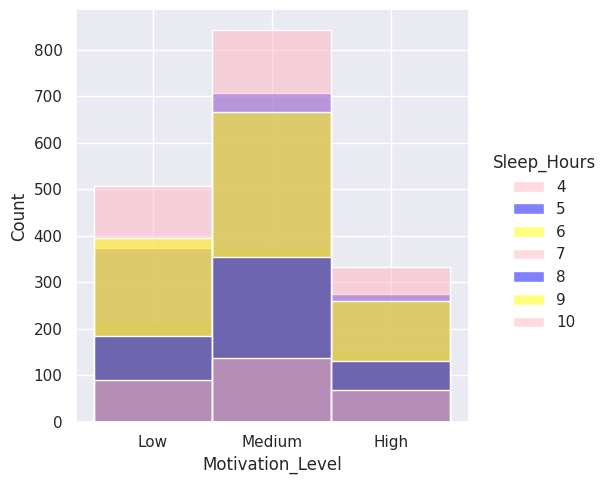

In [ ]:
sns.displot(data = ds, hue = 'Sleep_Hours', x = 'Motivation_Level', palette = [ "lightpink","blue","yellow"], discrete=True)

Motivation vs Exam Scores - keep

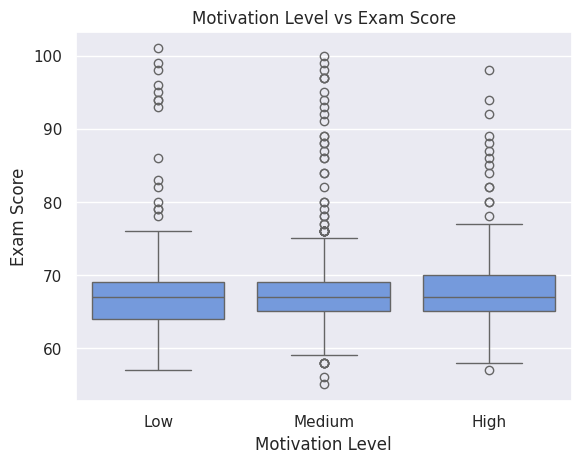

In [ ]:
sns.boxplot(data=ds,x="Motivation_Level", y="Exam_Score", color="cornflowerblue")
plt.title('Motivation Level vs Exam Score')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.show()

Motivation, Exam scores, and sleep

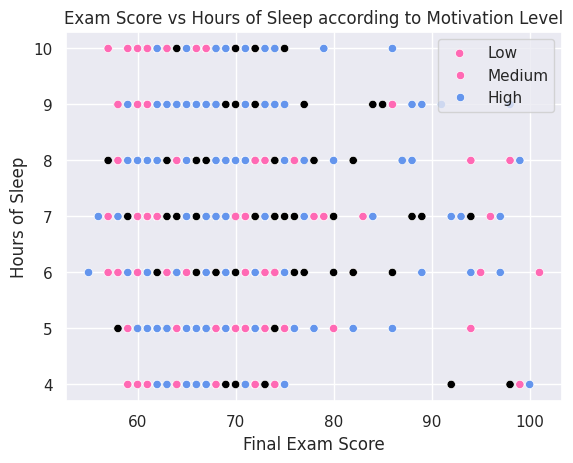

In [ ]:
#re-evaluate colors, maybe do something with more contrast?
sns.scatterplot(data=ds,y="Sleep_Hours", x="Exam_Score",hue="Motivation_Level", palette = ["hotpink","cornflowerblue","black"])
plt.title('Exam Score vs Hours of Sleep according to Motivation Level')
plt.xlabel('Final Exam Score')
plt.ylabel("Hours of Sleep")
plt.legend(labels=["Low", "Medium", "High"])
plt.show()

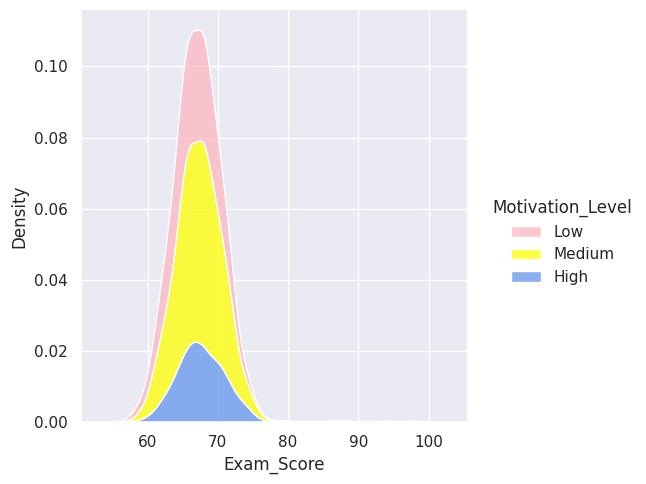

In [ ]:
sns.displot(data=ds, x="Exam_Score", hue="Motivation_Level", multiple="stack", kind="kde",palette=["lightpink","yellow","cornflowerblue"])
# figure out wht this graph actually means

In [ ]:
sns.regplot(data=ds, x='x', y='y', line_kws={'color': 'g'})

KeyError: 'x'

Mayhaps add in some scikit learn stuff here